In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
!pip install nltk spacy
import nltk
import spacy
import re

import en_core_web_sm
nlp = en_core_web_sm.load()

In [2]:
audible_data = pd.read_csv('cleaned_audible.csv')
audible_data.head()

,name,author,narrator,time,releasedate,language,stars,price,ratings,releaseyear,releasemonth
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,140,2008-08-04,English,5.0,468.00,34.0,2008,8
1,The Burning Maze,RickRiordan,RobbieDaymond,788,2018-05-01,English,4.5,820.00,41.0,2018,5
2,The Deep End,JeffKinney,DanRussell,123,2020-11-06,English,4.5,410.00,38.0,2020,11
3,Daughter of the Deep,RickRiordan,SoneelaNankani,676,2021-10-05,English,4.5,615.00,12.0,2021,10
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,600,2010-01-13,English,4.5,820.00,181.0,2010,1


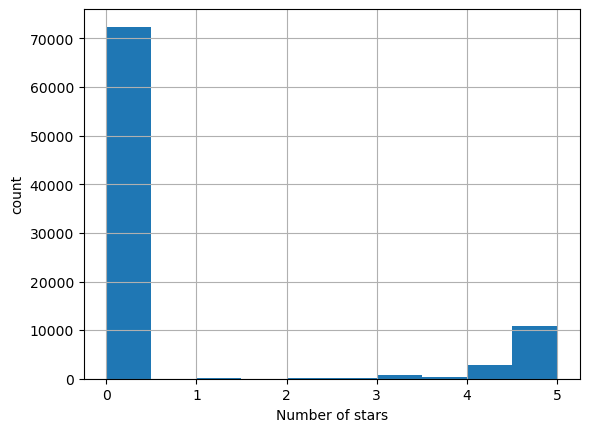

In [3]:
audible_data['stars'].hist()
plt.xlabel('Number of stars')
plt.ylabel('count');

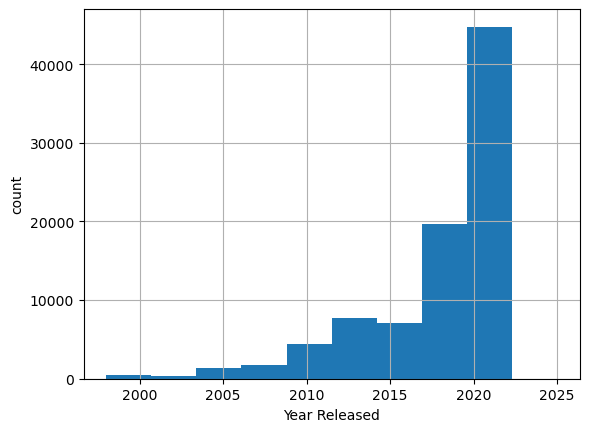

In [4]:
audible_data['releaseyear'].hist()
plt.xlabel('Year Released')
plt.ylabel('count');

In [5]:
data = audible_data[['ratings', 'stars']]
correlation = data.corr()
correlation_coefficient = correlation.loc['ratings', 'stars']
correlation_coefficient

0.017204281330768928

<AxesSubplot:title={'center':'Scatter Plot of Number of Ratings and Stars'}, xlabel='Number of Ratings', ylabel='Stars'>

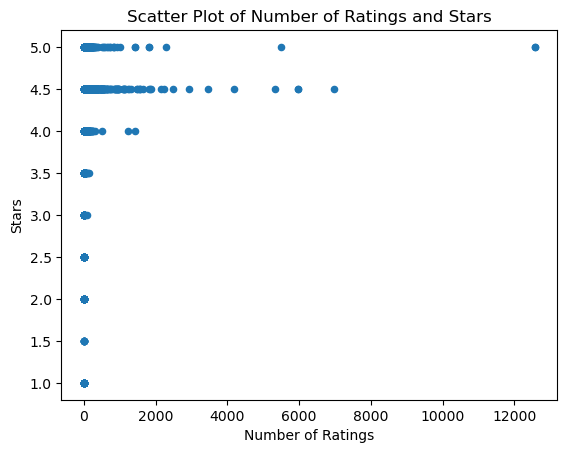

In [6]:
data.plot.scatter(x='ratings', y='stars', title='Scatter Plot of Number of Ratings and Stars', xlabel='Number of Ratings', ylabel='Stars')

In [7]:
data = audible_data[['releaseyear', 'ratings']]
correlation = data.corr()
correlation_coefficient = correlation.loc['releaseyear', 'ratings']
correlation_coefficient

0.0008539264193222383

In [8]:
audible_data['ratings'].isna().sum()

72417

In [9]:
has_ratings = audible_data.dropna()
has_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15072 entries, 0 to 87477
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          15072 non-null  object 
 1   author        15072 non-null  object 
 2   narrator      15072 non-null  object 
 3   time          15072 non-null  int64  
 4   releasedate   15072 non-null  object 
 5   language      15072 non-null  object 
 6   stars         15072 non-null  float64
 7   price         15072 non-null  object 
 8   ratings       15072 non-null  float64
 9   releaseyear   15072 non-null  int64  
 10  releasemonth  15072 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 1.4+ MB


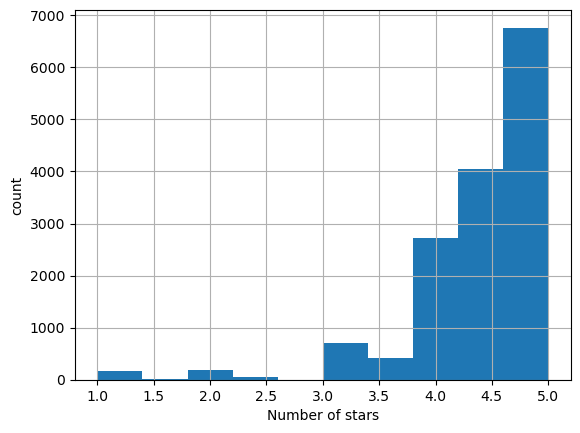

In [10]:
has_ratings['stars'].hist()
plt.xlabel('Number of stars')
plt.ylabel('count');

In [11]:
def extract_verb(text):
    doc = nlp(text)
    pos_tags = [token.pos_ for token in doc]
    has_verb = 'VERB' in pos_tags
    return has_verb

In [12]:
has_ratings['has_verb'] = has_ratings['name'].apply(extract_verb)
print(has_ratings)

                                             name            author  \
0                      Geronimo Stilton #11 & #12   GeronimoStilton   
1                                The Burning Maze       RickRiordan   
2                                    The Deep End        JeffKinney   
3                            Daughter of the Deep       RickRiordan   
4      The Lightning Thief: Percy Jackson, Book 1       RickRiordan   
...                                           ...               ...   
87228                                  Why We Fly          EvanRail   
87337                                  River Town      PeterHessler   
87340                      Figures in a Landscape       PaulTheroux   
87362                             Tower of London            iMinds   
87477                          Tigers in the Snow  PeterMatthiessen   

               narrator  time releasedate language  stars   price  ratings  \
0            BillLobely   140  2008-08-04  English    5.0  468.00    

/var/folders/s1/tlccbrh56tl749vyv08rkw4h0000gn/T/ipykernel_98588/2771353353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_ratings['has_verb'] = has_ratings['name'].apply(extract_verb)


In [13]:
has_ratings[has_ratings['has_verb'] == True]['name'].head()

48     The Skeletons Strike Back
59            You Only Die Twice
67              Never Say Genius
86               Lost in the End
102       A Boy Called Christmas
Name: name, dtype: object

In [14]:
has_ratings[has_ratings['has_verb'] == False]['name'].head()

0                    Geronimo Stilton #11 & #12
1                              The Burning Maze
2                                  The Deep End
3                          Daughter of the Deep
4    The Lightning Thief: Percy Jackson, Book 1
Name: name, dtype: object

In [15]:
has_verb = has_ratings.has_verb

correlation = has_ratings['stars'].corr(has_verb)

print(f"Correlation between 'Stars' and 'has_verb': {correlation}")

Correlation between 'Stars' and 'has_verb': -0.007429853706257212


In [16]:
has_verb.value_counts()

False    11796
True      3276
Name: has_verb, dtype: int64

In [17]:
def extract_noun(text):
    doc = nlp(text)
    pos_tags = [token.pos_ for token in doc]
    has_noun = 'NOUN' in pos_tags or 'PROPN' in pos_tags
    return has_noun

In [18]:
has_ratings['has_noun'] = has_ratings['name'].apply(extract_noun)
print(has_ratings)

                                             name            author  \
0                      Geronimo Stilton #11 & #12   GeronimoStilton   
1                                The Burning Maze       RickRiordan   
2                                    The Deep End        JeffKinney   
3                            Daughter of the Deep       RickRiordan   
4      The Lightning Thief: Percy Jackson, Book 1       RickRiordan   
...                                           ...               ...   
87228                                  Why We Fly          EvanRail   
87337                                  River Town      PeterHessler   
87340                      Figures in a Landscape       PaulTheroux   
87362                             Tower of London            iMinds   
87477                          Tigers in the Snow  PeterMatthiessen   

               narrator  time releasedate language  stars   price  ratings  \
0            BillLobely   140  2008-08-04  English    5.0  468.00    

/var/folders/s1/tlccbrh56tl749vyv08rkw4h0000gn/T/ipykernel_98588/967379496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_ratings['has_noun'] = has_ratings['name'].apply(extract_noun)


In [19]:
has_ratings[has_ratings['has_noun'] == True]['name'].head()

0                    Geronimo Stilton #11 & #12
1                              The Burning Maze
2                                  The Deep End
3                          Daughter of the Deep
4    The Lightning Thief: Percy Jackson, Book 1
Name: name, dtype: object

In [20]:
has_ratings[has_ratings['has_noun'] == False]['name'].head()

59              You Only Die Twice
110                       Unlocked
1036    When Did You See Her Last?
1472                Now We Are Six
1575       When We Were Very Young
Name: name, dtype: object

In [21]:
has_noun = has_ratings.has_noun

correlation = has_ratings['stars'].corr(has_noun)

print(f"Correlation between 'Stars' and 'has_noun': {correlation}")

Correlation between 'Stars' and 'has_noun': -0.006869584343730276


In [22]:
has_noun.value_counts()

True     13897
False     1175
Name: has_noun, dtype: int64

In [23]:
def extract_adj(text):
    doc = nlp(text)
    pos_tags = [token.pos_ for token in doc]
    has_adj = 'ADJ' in pos_tags
    return has_adj

In [24]:
has_ratings['has_adj'] = has_ratings['name'].apply(extract_adj)
print(has_ratings)

                                             name            author  \
0                      Geronimo Stilton #11 & #12   GeronimoStilton   
1                                The Burning Maze       RickRiordan   
2                                    The Deep End        JeffKinney   
3                            Daughter of the Deep       RickRiordan   
4      The Lightning Thief: Percy Jackson, Book 1       RickRiordan   
...                                           ...               ...   
87228                                  Why We Fly          EvanRail   
87337                                  River Town      PeterHessler   
87340                      Figures in a Landscape       PaulTheroux   
87362                             Tower of London            iMinds   
87477                          Tigers in the Snow  PeterMatthiessen   

               narrator  time releasedate language  stars   price  ratings  \
0            BillLobely   140  2008-08-04  English    5.0  468.00    

/var/folders/s1/tlccbrh56tl749vyv08rkw4h0000gn/T/ipykernel_98588/3448290500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_ratings['has_adj'] = has_ratings['name'].apply(extract_adj)


In [25]:
has_ratings[has_ratings['has_adj'] == True]['name'].head()

13    Magnus Chase and the Ship of the Dead
21    Eldest: The Inheritance Cycle, Book 2
45                  Secret of the Red Arrow
65                           Dangerous Gift
93                           The Last Human
Name: name, dtype: object

In [26]:
has_ratings[has_ratings['has_adj'] == False]['name'].head()

0                    Geronimo Stilton #11 & #12
1                              The Burning Maze
2                                  The Deep End
3                          Daughter of the Deep
4    The Lightning Thief: Percy Jackson, Book 1
Name: name, dtype: object

In [27]:
has_adj = has_ratings.has_adj

correlation = has_ratings['stars'].corr(has_adj)

print(f"Correlation between 'Stars' and 'has_adj': {correlation}")

Correlation between 'Stars' and 'has_adj': -0.008141252570095611


In [28]:
has_adj.value_counts()

False    13378
True      1694
Name: has_adj, dtype: int64

In [29]:
def extract_date(text):

    doc = nlp(text)
    dates = [ent.text for ent in doc.ents if ent.label_ == 'DATE' or re.match(r'\d{4}', ent.text)]
    has_date = bool(dates)
    print(doc)
    print(dates)
    return has_date

In [30]:
has_ratings['has_date'] = has_ratings['name'].apply(extract_date)
print(has_ratings)

Geronimo Stilton #11 & #12
[]
The Burning Maze
[]
The Deep End
[]
Daughter of the Deep
[]
The Lightning Thief: Percy Jackson, Book 1
[]
The Hunger Games: Special Edition
[]
Quest for the Diamond Sword
[]
The Dark Prophecy
[]
Merlin Mission Collection
[]
The Tyrant’s Tomb
[]
The Titan's Curse: Percy Jackson, Book 3
[]
Magic Tree House Collection: Books 9-16
[]
Magic Tree House Collection: Books 1-8
[]
Magnus Chase and the Ship of the Dead
[]
Northern Lights
[]
Geronimo Stilton #13 and #14
[]
Magic Tree House Collection
[]
Exile
[]
Merlin Mission Collection
[]
Neverseen
[]
The Tower of Nero
[]
Eldest: The Inheritance Cycle, Book 2
[]
Artemis Fowl
[]
Geronimo Stilton 22 & 24
[]
Percy Jackson and the Battle of the Labyrinth
[]
Winnie-the-Pooh
[]
Magic Tree House Collection: Books 25-32
[]
Geronimo Stilton #20 and #21
[]
The Red Pyramid
[]
Mystery of the Griefer's Mark
[]
Geronimo Stilton #17
[]
The House at Pooh Corner
[]
Mission Unstoppable
[]
Darkness of Dragons
[]
The Adventures of Rust

Laloo Bandar, Nathoo Magarmach
[]
Kaka and the Mouse
[]
The Fish Who Found the Sea
[]
Bondu Kaagi
[]
The Snake Who Came to Stay
[]
Ember Rising
[]
Selected Just So Stories
[]
Dost Machiliya Teen
[]
Twilight Sparkles prinsessbesvärjelse och andra berättelser
[]
Bablu and the Mouse
[]
We're All Wonders
[]
Lomdi Aur Gileheri [Fox and Squirrel]
[]
DogZombies Rule for Now
[]
Bambi
[]
Dorje’s Stripes
[]
The Gruffalo Song & Other Songs
[]
Dear Zoo and Friends
[]
The Four Friends
[]
Gauri and the Talking Cow
[]
Dinosaur Trouble
[]
Legion
[]
Great Choice, Camille!
[]
The Velveteen Rabbit
[]
The Llama Llama Audiobook Collection
[]
Puss in Boots
[]
Viva Durant and the Secret of the Silver Buttons
[]
The Mystwick School of Musicraft
[]
Meet Me There
[]
This Lullaby
[]
Michael Jackson: Ultimate Music Legend
[]
Echo
[]
The Amazing Mystery Show
[]
Stage Fright on a Summer Night
[]
Superstar Watch
[]
Who Was Leonardo da Vinci?
[]
No Ballet Shoes in Syria
[]
If You're Happy and You Know It
[]
Harry's P

Artemis Fowl and the Opal Deception
[]
Boy
[]
Dog Days
[]
Diary of an Awesome Friendly Kid
[]
Dragon Planet
[]
Alice's Adventures in Wonderland
[]
Alice in Wonderland
[]
The World's Worst Teachers
[]
Everything's Amazing (Sort of)
[]
A Wrinkle in Time
[]
The Terrible Two's Last Laugh
[]
The Terrible Two Go Wild
[]
The Brilliant World of Tom Gates
[]
Interview with the Robot
[]
The Room on the Roof
[]
Big Nate Audio Collection: Books 1-4
[]
The Golden Orchard
[]
Camp Cacophony
[]
The Fever Code
[]
Zoey and Sassafras Boxed Set: Books 1-6
[]
Hanuman the Mighty
[]
Robot Warriors
[]
Galactic Battle
[]
The Weirdies
[]
Twinkle Twinkle, Little Star: Bedtime Songs and Lullabies
[]
Warlord's Revenge
[]
Zog
[]
Peter Pan
[]
The Serpent's Shadow
[]
James and the Giant Peach
[]
Arsene Lupin vs. Sherlock Holmes [Classic Tales Edition]
[]
Magic Tree House: Books 33 & 34
[]
Chicken Soup for the Child's Soul: Character-Building Stories to Read with Kids Ages 5 - 8
['Ages 5 - 8']
Viva Durant and the Madn

Talk to Me
[]
Only Humans Need Apply
[]
A Prescription for Change
[]
Who's Afraid of AI?
[]
No One at the Wheel
[]
The Re-Origin of Species
[]
Driverless
[]
Designing Data-Intensive Applications
[]
The Model Thinker
[]
How to Win an Indian Election
[]
Competing in the Age of AI
['the Age of AI']
Blockchain
[]
The Real Business of Blockchain
[]
Behind Every Good Decision
[]
Data Mining Techniques, Third Edition
[]
Big Data in Practice
[]
Strategic Analytics
[]
The Business Blockchain
[]
Infonomics
[]
The New World Economy
[]
The Internet of Things
[]
The Fuzzy and the Techie
[]
Phishing Dark Waters
[]
Digital Minimalism
[]
Exponential
[]
Super Pumped
[]
ColdFusion Presents
[]
Modern Monopolies
[]
So You've Been Publicly Shamed
[]
The Inevitable
[]
The Art of Invisibility
[]
Stealing Fire
[]
How to Do Nothing
[]
A World Without Email
[]
Thank You for Being Late
[]
Social Engineering
[]
The Fourth Industrial Revolution
[]
Soonish
[]
Failure Is Not an Option
[]
Being Online
[]
Ten Argument

Learn French with Innovative Language's Proven Language System - Level 3: Beginner French
[]
Learn Spanish with Innovative Language's Proven Language System - Level 1: Introduction to Spanish
[]
Learn Spanish - Word Power 101
[]
Learn Korean - Word Power 101
[]
Learn Spanish with Innovative Language's Proven Language System - Level 3: Beginner Spanish
[]
Learn Hindi - Level 1: Introduction to Hindi
[]
English Fluency for Adult - How to Learn and Speak English Fluently as an Adult
[]
Learn Arabic - Word Power 101
[]
Learn French with Innovative Language's Proven Language System - Level 2: Absolute Beginner French
[]
Learn English with Innovative Language's Proven Language System - Level 5: Advanced English
[]
Learn French: Word Power 101
[]
Audiotraining Plus - German as a foreign language
[]
Learn Japanese with Innovative Language's Proven Language System - Level 1: Introduction to Japanese
[]
French for Beginners
[]
English Vocabulary Master - Phrasal Verbs in Situations. For Intermed

The Greatest Love Story Ever Told
[]
The Queer Art of Failure
[]
How to Shoot Video That Doesn't Suck
[]
Hannibal Rising
[]
The Laws of Simplicity
[]
The Godfather Notebook
[]
Love, Lucy
[]
Art Money Success: Finally Make Money Doing What You Love
[]
Picasso and the Painting That Shocked the World
[]
Why Does the Screenwriter Cross the Road?
[]
Feck Perfuction
[]
Max Factor
[]
Star Trek Psychology
[]
That's What Fashion Is
[]
The Hare with Amber Eyes
[]
The Late Shift
[]
Trekonomics
[]
The Longing for Less
[]
Chanel
[]
Family Don't End with Blood
[]
The Woman in Black
[]
Paddle Your Own Canoe
[]
Reshaping Art
[]
How Not to Make a Short Film
[]
This Is Not a Fashion Story
[]
The Waste Land and Other Poems
[]
Am I There Yet?
[]
The World of Critical Role
[]
Talk Show
[]
So Much Longing in So Little Space
[]
The Big Picture
[]
'House' and Psychology: Humanity Is Overrated
[]
Warner Bros
[]
In Montmartre
[]
Disrobed
[]
A Thousand Small Sanities
[]
The Prophet & The Wanderer
[]
How To Survi

So, Anyway...
[]
The Amazing Book Is Not on Fire
[]
One of a Kind
[]
Dwayne 'The Rock' Johnson: The Life, Lessons & Rules for Success
[]
Neil Patrick Harris: Choose Your Own Autobiography
[]
Eric Clapton
[]
Lead Like Walt
[]
All the Money in the World
[]
The Outsider
[]
Notes on Blindness
[]
Insight
[]
What's It All About?
[]
Coach Wooden and Me
[]
Relentless
[]
Themes and Variations
[]
Mud, Sweat and Tears
[]
The Devil in the Kitchen
[]
The Beauty of Living Twice
[]
The Elephants in My Backyard
[]
Committed
[]
Bol Bachchan [Speak Bachchan]
[]
Wallflower at the Orgy
[]
The Rothschilds
[]
Scenes from a Writer's Life
[]
If I Could Tell You Just One Thing
[]
Stanley Kubrick and Me
[]
The Writing Life
[]
If I Did It
[]
Dave Barry Does Japan
[]
The Story of My Life
[]
The Plot Against the President
[]
The Life
[]
Full Disclosure
[]
Goldie
[]
Youtubers
[]
The Terror Years
['The Terror Years']
The Bassoon King
[]
Straight Outta Crawley
[]
A Carlin Home Companion
[]
My Life in France
[]
I Am J

Stalin
[]
I, Rigoberta Menchú
[]
With All Due Respect
[]
Not Just an Accountant
[]
The Politics Book
[]
Malala Hoon Main
[]
The Rise and Fall of Adolf Hitler
[]
Indomitable Spirit
[]
Becoming (Polish Edition)
[]
The Turbulent Years
[]
Thirst
[]
100 quotes by Benjamin Franklin
[]
Lucky
[]
Hitler and Stalin
[]
A River in Darkness
[]
The Dalai Lama
[]
A Spy Like No Other
[]
Permanent Record (German edition)
[]
Joe Biden
[]
The Six Wives of Henry VIII
[]
The Trial of Henry Kissinger
[]
Karl Marx
[]
The World As It Is
[]
Can't Is Not an Option
[]
Mahatma Gandhi
[]
For the Love of a Son
[]
Princess
[]
Keeping at It
[]
Hirohito and the Making of Modern Japan
[]
The Toddler in Chief
[]
Kissinger
[]
Notorious RBG
[]
Mistresses
[]
Let Her Fly
[]
Gopalganj to Raisina
[]
100 quotes by Abraham Lincoln
[]
Speeches and Writings of Abraham Lincoln
[]
Tomorrow Will Be Different
[]
The Naked God
[]
Churchill: A Life, Part 1 (1874-1918)
['1874-1918']
Princess Sultana's Circle
[]
Nightmarch
[]
...And What

Do the KIND Thing
[]
King of Hearts
[]
The Man Who Sold America
[]
The Wisdom of Wolves
[]
I'm Feeling Lucky
[]
Uncle Tungsten
[]
Google Speaks
[]
The Making of Modern Economics
[]
Why I Left Goldman Sachs
[]
The Eden Express
[]
The Drug Hunters
[]
When Blood Breaks Down
[]
All Things Bright and Beautiful
[]
Ecce Homo
[]
Blue Collar, Blue Scrubs
[]
Half-Life
[]
Men and Rubber, The Story of Business
[]
Things I've Been Silent About
[]
Terrible Typhoid Mary
[]
Scorpions
[]
Second Sight
[]
The First Billion Is the Hardest
[]
Heat
[]
Second Suns
[]
The Long Run
[]
The Wright Brothers
[]
No Dream Is Too High
[]
We Are All Stardust
[]
The AIG Story
[]
I'm Not Really a Waitress
[]
Wilderness Essays
[]
The Clockwork Universe
[]
The Pope of Physics
[]
Pappyland
[]
Autobiography of a Yogi - Original Edition
[]
Nine Lives
[]
Autobiography of a Yogi
[]
Swami Vivekananda
[]
Swami Vivekananda
[]
Muhammad: A Story of the Last Prophet
[]
The Journey Home
[]
Autobiography of a Yogi (Hindi Edition)
[]
A

A False Report
[]
The Cadaver King and the Country Dentist
[]
Darker Than Night
[]
Chin
[]
Evidence of Love
[]
The Infiltrator
[]
Till Murder Do Us Part
[]
The Woman on the Windowsill
[]
Becoming
[]
A Space of Her Own
[]
Figuring
[]
Close to the Bone
[]
Untamed
[]
Wild
[]
Educated
[]
Yes Please
[]
The Moment of Lift
[]
Buy Yourself the F--king Lilies
[]
The Shaytan Bride
[]
Everything I Know About Love
[]
Feminist City
[]
Sex & Cupcakes
[]
Sometimes I Trip On How Happy We Could Be
[]
Spirit Junkie
[]
The Soul of a Woman
[]
Under the Tuscan Sun
[]
The Empathy Diaries
[]
What We Don't Talk About When We Talk About Fat
[]
Dear Senthuran
[]
The Woman They Could Not Silence
[]
A Year by the Sea
['A Year']
Yasmeena's Choice
[]
The Gospel According to Coco Chanel
[]
From Miniskirt to Hijab
[]
Princess, More Tears to Cry
[]
Funny in Farsi
[]
Grandma Gatewood's Walk
[]
More Than a Woman
[]
Outrageous Acts and Everyday Rebellions
[]
Princess Sultana's Daughters
[]
Loitering with Intent
[]
In Pra

Leadership Is Language
[]
Lessons from the Titans
[]
Experimentation Works
[]
Management
[]
The Four Obsessions of an Extraordinary Executive
[]
Alive at Work
[]
Tribes
[]
HBR Handbooks Series: Harvard Business Review Project Management Handbook
[]
Toyota Kata
[]
The New IT
[]
The Attributes
[]
The Phoenix Encounter Method
[]
No B.S. Time Management for Entrepreneurs
[]
Exponential Organizations
[]
The Miracle Morning for Entrepreneurs
[]
What Is Six Sigma?
[]
You Can Change Other People
[]
Think Like Amazon
[]
Smart Choices
[]
Building and Managing High-Performance Distributed Teams
[]
Inked
[]
The Innovator's DNA
[]
Speak!
[]
Chillpreneur
[]
The Creator Mindset
[]
Find Your Why by Simon Sinek, David Mead, Peter Docker - Book Summary
[]
Beyond the E-Myth
[]
Servant Leadership in Action
[]
The Data Driven Leader
[]
Be More Wrong
[]
Fast Focus
[]
Leading at a Distance
[]
HBR's 10 Must Reads 2021: The Definitive Management Ideas of the Year from Harvard Business Review
['2021']
Primal Le

Marketing 5.0
[]
The Bitcoin Standard
[]
The Psychology of Selling
[]
Marketing 4.0
[]
Market Wizards
[]
Expert Secrets
[]
To Sell Is Human
[]
The Art of Closing the Sale
[]
Product-Led Growth
[]
SPIN Selling
[]
Nawabs, Nudes, Noodles
[]
The Future of Money
[]
Secrets of Closing the Sale
[]
All Marketers Are Liars
[]
Understanding Digital Marketing
[]
Gap Selling: Getting the Customer to Yes
[]
Blockchain Revolution
[]
Storytelling with Data
[]
How Brands Grow
[]
This Is Marketing
[]
The Adweek Copywriting Handbook
[]
The 1-Page Marketing Plan
[]
Narrative Economics
[]
Competing Against Luck
[]
Dotcom Secrets
[]
Sell or Be Sold: How to Get Your Way in Business and in Life
[]
Building a StoryBrand
[]
Alchemy
[]
Sawal Hi Jawab Hai
[]
Obviously Awesome
[]
The Wisdom of Crowds
[]
Naked Money
[]
Unleash the Power of Storytelling
[]
The Ultimate Sales Machine
[]
Marketing Made Simple
[]
Launch (Updated & Expanded Edition)
[]
Sell
[]
Misbehaving
[]
Expert Secrets
[]
Nudge
[]
Marketing: A Guid

The Ultimate Sandler Sales Library
[]
62 Free Ways to Grow Your Business Profits
[]
Overdeliver
[]
The Sandler Rules
[]
The Conversion Code
[]
The Neuroscience of Selling
[]
Retail Success in an Online World
[]
Fundamentals of Marketing, 2nd Edition
['2nd']
The W. Chan Kim & Renée Mauborgne Blue Ocean Strategy Reader
[]
Heart and Sell
[]
Talk Triggers
[]
Winning the Brain Game
[]
The Social Entrepreneur's Playbook, Expanded Edition
[]
Beach Money
[]
How to Get Ideas
[]
The Irresistible Offer
[]
Combo Prospecting
[]
Selling Luxury
[]
Promote Yourself and Me 2.0
[]
Stuffocation
[]
High Trust Selling
[]
Inbound Content
[]
The Convenience Revolution
[]
When Buyers Say No
[]
The Miracle Morning for Network Marketers
[]
HBR's 10 Must Reads on Managing Across Cultures
[]
Stop Selling and Start Leading
[]
Who Do You Want Your Customers to Become
[]
Sandler Success Principles
[]
Fascinate
[]
Pitch the Perfect Investment
[]
Storyshowing
[]
Sell It Today, Sell It Now
['Today']
The Culture Code
[]

Blind Spots
[]
Your Best Year Ever
[]
The Executive Voice Trainer
[]
The 2-Hour Job Search
[]
The 100-Year Life
[]
A Book of Five Rings: The Strategy of Musashi
[]
The Job Closer
[]
The Book of Five Rings
[]
Start Your Farm
[]
The Unchained Man: The Alpha Male 2.0: Be More Happy, Make More Money, Get Better with Women, Live More Free
[]
Couples That Work
[]
Laws of Lifetime Growth
[]
Work the System (Fourth Edition)
[]
The New York Times Pocket MBA
[]
Get It Done Now!
[]
Success Habits
[]
4 Ways to Stop Self-Sabotage
[]
Nice Girls Don't Get the Corner Office & Nice Girls Don't Get Rich
[]
Superconnector
[]
The Science of Rapid Skill Acquisition (Second Edition)
[]
How to Read a Person Like a Book
[]
The Science of Fear
[]
The Art of War
[]
Five Stars
[]
A Book of Five Rings
[]
The Five-Minute Interview, 3rd Edition
[]
Nine Things Successful People Do Differently
[]
Money Loves Speed
[]
Born to Win
[]
The Art of Non-Conformity
[]
Start Late, Finish Rich
[]
Networking for People Who Hate

Yes, You Can Do This!
[]
Double Your Income Doing What You Love
[]
The Changemaker Mindset
[]
Make, Think, Imagine
[]
Dance of Change
[]
The Six Secrets of Raising Capital
[]
The Sticking Point Solution
[]
6 Months to 6 Figures
['6 Months']
Disrupt-Her
[]
Exactly Where to Start
[]
Engine of Impact
[]
The Pursuit of Wow!
[]
The Ride of a Lifetime
[]
Impact
[]
Startup Communities
[]
The Startup Community Way
[]
The REAL Entrepreneur
[]
Lead Successful Projects
[]
The Employee Experience
[]
Entrepreneur Voices on Elevator Pitches
[]
Business Storytelling for Dummies
[]
Berkshire Beyond Buffett
[]
What Self-Made Millionaires Do That Most People Don't
[]
S.U.M.O (Shut Up, Move On)
[]
Straight Talk on Trade
[]
Total Leadership
[]
The Martha Rules
[]
Synchronicity
[]
Hire Smart From the Start
[]
Rich as F--k
[]
Nice Girls Don't Get the Corner Office (10th Anniversary Edition)
[]
The Confidence Code
[]
Women and Leadership
[]
My Money My Way
[]
Rewire for Wealth
[]
Brotopia
[]
Successful Women

Conquest of Mind
[]
The Four Foundations of Mindfulness in Plain English
[]
The Power is Within You
[]
The Magic of Awareness
[]
The Places That Scare You
[]
Zen: The Art of Simple Living
[]
The Mindful Day
['The Mindful Day']
The Quantum Doctor
[]
Watchfulness Awareness Alertness
[]
The Wellness Sense
[]
Mindfulness in Plain English
[]
Wherever You Go There You Are
[]
Altered Traits: Science Reveals How Meditation Changes Your Mind, Brain, and Body
[]
Passage Meditation - A Complete Spiritual Practice
[]
The Heart Sutra
[]
Healing and Recovery
[]
The 4 Pillar Plan
[]
Self-Healing
[]
The Last Law of Attraction Book You’ll Ever Need to Read
[]
A Monk's Guide to a Clean House and Mind
[]
Beyond Mindfulness in Plain English
[]
The Healing Power of Mind
[]
Buddha's Brain
[]
The Presence Process
[]
Creative Visualization Meditations
[]
Deep Sleep with Medical Hypnosis
[]
Accessing the Healing Power of the Vagus Nerve
[]
Dhyan [Care]
[]
Breath By Breath
[]
Abiding in Mindfulness, Vol. 3
[]
M

The Obesity Code
[]
The 4-Hour Body
[]
Target 100
[]
Deep Nutrition
[]
Runner's World Complete Book of Running
[]
Change Your Schedule, Change Your Life
[]
Good Calories, Bad Calories
[]
The China Study, Revised and Expanded Edition
[]
Burn the Fat, Feed the Muscle
[]
How Not to Diet
[]
Exercised
[]
The Complete Guide to Fasting
[]
The Body Fat Solution
[]
The Magic Weight-Loss Pill
[]
The Circadian Code
[]
Body by Science
[]
The Comfort Crisis
[]
What I Talk About When I Talk About Running
[]
Living with a SEAL
[]
Mini Habits for Weight Loss
[]
Eat Delete
[]
From Death to Birth
[]
The Little Black Book of Workout Motivation
[]
The Bulletproof Diet
[]
Cooked
[]
Undo It!
[]
Feel Great, Lose Weight
[]
Beyond Bigger Leaner Stronger
[]
Mindless Eating
[]
Wheat Belly
[]
Awakening Shakti
[]
The Bliss of Inner Fire
[]
Head Strong
[]
Buddha’s Diet
[]
Motivational Interviewing in Nutrition and Fitness (Applications of Motivational Interviewing)
[]
1:59
[]
The Tibetan Yoga of Breath
[]
A Course 

p53: The Gene That Cracked the Cancer Code
[]
HIV and AIDS
[]
Luminous Life
[]
Stronger After Stroke, Third Edition
[]
The Sawbones Book
[]
The Twenty-Four Hour Mind
[]
Inventing the AIDS Virus
[]
Hacking the Code of Life
[]
Wild Power
[]
The Beautiful Cure
[]
Dreams of Awakening
[]
Awakenings
[]
The Mind's Eye
[]
The HeartMath Solution
[]
Your Blood Never Lies
[]
Ending Parkinson's Disease
[]
The Remarkable Life of the Skin
[]
The Human Superorganism
[]
The Trying Game
[]
Stress-Free Diabetes
[]
Why We Dream
[]
On Becoming a Doctor
[]
Faith, Hope, and Healing
[]
Pandemic 1918
['1918']
Dreams
[]
Pandemics
[]
The Cancer Revolution
[]
The Science of Marijuana, Third Edition
[]
How to Tell If You Have a Healthy Brain
[]
The Beginning of Everything
[]
How to Fall Asleep
[]
Advances in Stroke Interventions
[]
One Bra Strap at a Time
[]
Why Has Nobody Told Me This Before?
[]
Cues
[]
Happy Mind, Happy Life
[]
Adult Children of Emotionally Immature Parents
[]
Art of Seduction
[]
The Courage to

Stop Walking on Eggshells, Third Edition
[]
Psychological Types
[]
The Lucifer Effect
[]
A General Introduction to Psychoanalysis
[]
Don't Say Yes When You Want to Say No
[]
Loving Someone with Borderline Personality Disorder
[]
She
[]
The Journey from Abandonment to Healing
[]
Build a Better Brain
[]
How Confidence Works
[]
The Psychology of Stupidity
[]
Three Women
[]
The Moral Animal
[]
Say What You Mean
[]
Man’s Search for Himself
[]
Order from Chaos
[]
Narcissistic Mothers and Grown Up Daughters
[]
The Memory Thief
[]
Unf--k Your Anxiety
[]
Yes! 50 Secrets from the Science of Persuasion
[]
Hardwiring Happiness
[]
Expert Secrets - Communication Skills, Critical Thinking and NLP
[]
You Are Not So Smart
[]
It's OK That You're Not OK
[]
In Sheep's Clothing
[]
A Body to Love
[]
Modern Man in Search of a Soul
[]
The Polyvagal Theory in Therapy
[]
The Psychology of Self-Esteem
[]
CBT + DBT + ACT
[]
Modern Man in Search of a Soul
[]
Positive Discipline Parenting Tools
[]
PSYCH UP
[]
The S

The History of Rome, Volume 3: Books 21-25
[]
24 Hours in Ancient Egypt
[]
When Time Began
[]
The Fall of the Roman Empire
[]
The Lifetimes When Jesus and Buddha Knew Each Other
[]
Ravenna
[]
Dancing in the Streets
[]
Jesus on Trial
[]
The March of the Ten Thousand
['March']
The History of Rome, Volume 1, Books 1 - 5
[]
The Neanderthals Rediscovered
[]
Ghost on the Throne
[]
Red Land, Black Land
[]
Thebes
[]
Sparta's Second Attic War
[]
Sparta's First Attic War
[]
Masada
[]
Book of Myths
[]
Big Gods
[]
The Day Democracy Died
[]
Apostle
[]
The End of the Ancient World and the Beginnings of the Middle Ages
[]
The Complete Works of Tacitus: Volume 1: The Annals, Part 1
[]
Three Stones Make a Wall
[]
The Story of Greece and Rome
[]
Ancient Times - 19 Great Works Summaries
[]
The History of Rome, Volume 5: Books 33 - 39
[]
#Tatastories
[]
An Era of Darkness
[]
How Asia Works
[]
Inglorious Empire
[]
The Lost River
[]
Everybody Loves a Good Drought
[]
Opium Inc.
[]
Land of Seven Rivers
[]
Ind

A Little History of Religion
[]
How Democracies Die
[]
Making Sense
[]
Christianity
[]
The 108 Upanishads
[]
Siyasi Muslims
[]
The RSS
[]
Jesus and the Essenes
[]
The Bhagavad Gita (Lives of Great Religious Books)
[]
God
[]
The Tibetan Book of the Dead
[]
The Magna Carta of Humanity
[]
This Unquiet Land
[]
A History of Magic, Witchcraft and the Occult
[]
The Protestant Ethic and the Spirit of Capitalism
[]
An Atheist's History of Belief
[]
The Court and the Cross
[]
Infiltration: The Plot to Destroy the Church from Within
[]
Catholicism
[]
Jews, God, and History
[]
God Has a Dream
[]
The Gospel of Thomas
[]
The Twilight of the American Enlightenment
[]
The World of Myth
[]
God Speaks Again
[]
The Consequences of Ideas
[]
Well Versed
[]
Reformation Heroes, Volume 1
[]
Shinto, Simple Guides
[]
Red Notice
[]
All the Kremlin's Men
[]
Collapse
[]
Red Famine
[]
The Russian Revolution
[]
A People’s Tragedy
[]
A Short History of Russia
[]
Chernobyl
[]
October
['October']
The Vladimir Lenin Col

Kestrel's Chance
[]
The Prettiest Star
[]
Drawn Together
[]
The Last Sun
[]
History Is All You Left Me
[]
The Hitman's Guide to Tying the Knot Without Getting Shot
[]
His Cocky Valet
[]
The Wolf at the Door
[]
The Empress of Salt and Fortune
[]
Paper Love
[]
Memorial
[]
Brothers of the Wild North Sea
[]
Love and Murder on Quarantine Island
[]
Finders Keepers
[]
Once Upon a Princess
[]
Alphas Like Us
[]
Where You Are
[]
Fierce Femmes and Notorious Liars
[]
Hidden in Darkness
[]
Fair Game
[]
Broken Pieces
[]
A Matter of Time, Volume 2
[]
Bear, Otter, and the Kid
[]
Her Name in the Sky
[]
What Belongs to You
[]
Graceful Burdens
[]
The Hanged Man
[]
Snow Storm
[]
Band Sinister
[]
Snow Falling
[]
Passion’s Bright Fury
[]
Hunter’s Way
[]
Fair Play
[]
Stranger on the Shore
[]
Against Doctor’s Orders
[]
Sacred Country
[]
Hard to Hold
[]
Hard to Get
[]
A Dangerous Dance
[]
Badlands
[]
The Black Tides of Heaven
[]
Triple Threat
[]
A Light in the Darkness
[]
Deception in Darkness
[]
An Unnatural 

Twenty Thousand Leagues Under the Sea
[]
The Extinction Survival Series Box Set
[]
The Last Light
[]
The 6th Extinction
[]
Oh, Great! I Was Reincarnated as a Farmer
[]
Sidney Sheldon's Reckless
[]
Dark Age
[]
The First Wall
[]
Tiamat's Wrath
[]
Reincarnated as the Last of My Kind: Volume 2
[]
Defiance of the Fall 3
[]
The Finish Line
[]
Defiance of the Fall 2
[]
Invisible Sun
[]
The Exiled Fleet
[]
Wagga
[]
Initialization
[]
The Starless Crown
[]
Winter Solstice
[]
Will Save the Galaxy for Food
[]
Prodigal Son
[]
The Shadows Over Marquette
[]
The Last Physicist
[]
Midnight Days
['Midnight Days']
The Curious Incident of the Dog in the Night-Time (Unabridged)
[]
Cause for War
[]
The Tale of Princess Fatima, Warrior Woman
[]
Warlock
[]
Treasure Girl (Hindi Edition)
[]
Battlefield Reclaimer
[]
Geedad Ka Shikar [Jackal Hunt]
[]
The Chosen Ones
[]
Reborn as a Baron Lord
[]
Black Order
[]
Valkyrie
[]
Paternus: The Complete Trilogy
[]
The Legend of Randidly Ghosthound
[]
Sackett's Land
[]
The 

Haunted
[]
Stories Short and Sweet
[]
The Collected Stories
[]
Hulivesha Kategalu (Kannada Edition)
[]
The Things They Carried
[]
The Shell Collector
[]
Anupama Ganguly Ka Chautha Pyar [Anupama Ganguly's Fourth Love]
[]
Uncommon Type
[]
The Adventures of Sherlock Holmes
[]
101 Zen Stories
[]
The Curious Case of Benjamin Button
[]
Lamb to the Slaughter (A Roald Dahl Short Story)
[]
Cheaters
[]
Shadows for Silence in the Forests of Hell
[]
Edgar Allan Poe - The Complete Short Stories
[]
Fox 8
[]
The Faerie Games: The Complete Series
[]
The Martian Chronicles
[]
Stumbling Through Life
[]
Brief Interviews with Hideous Men
[]
The Vampire Archives
[]
No Middle Name
[]
An Elderly Lady Is Up to No Good
[]
Complete Innocence Boxset
[]
Ek Sau Aath [One Hundred and Eight]
[]
First Thrills
[]
Shadows Beneath
[]
Rusty Chala London Ki Ore
[]
A Clutch of Indian Masterpieces
[]
Era Murukan Short Stories
[]
My Man Jeeves
[]
Man Riding West
[]
This Long Vigil
[]
The Last Shifter
[]
O. Henry Short Storie

Three Men in a Boat
[]
The Screwtape Letters
[]
The Prophet
[]
Notes from Underground
[]
The Pilgrim's Progress
[]
A Christmas Carol
[]
The Home and the World
[]
Mahabharata Vol 7
[]
Oliver Twist
[]
Mrs. Dalloway
[]
A Tale of Two Cities
[]
Mahabharata, Vol. 2 (Part 1)
[]
Moby Dick
[]
The Scapegoat
[]
Badi Didi [Big Sister]
[]
The Well of Loneliness
[]
The Return of the Native
[]
Zorba the Greek
[]
Kim
[]
The Mysterious Affair at Styles [Classic Tales Edition]
[]
Wuthering Heights
[]
Middlemarch
[]
Snow Country
[]
Majhli didi (Hindi Edition)
[]
Mahabharata Vol 6
[]
Tamas
[]
The Kybalion
[]
Post Office
[]
The Wonderful Wizard of Oz
[]
Devils
[]
Gulliver's Travels
[]
Complete Shakespeare Tales
[]
The Wonderful Wizard of Oz
[]
Animal Farm
[]
The Haunting of Hill House
[]
Faro's Daughter
[]
The Scarlet Pimpernel (AmazonClassics Edition)
[]
White Sand: Volume Two [Dramatized Adaptation]
[]
Chronicle of a Death Foretold
[]
Far from the Madding Crowd
[]
The Divine Comedy
[]
The Moon Is Down
[]

The Zoya Factor
[]
The Counterfeit Candidate
[]
Snow
[]
Heaven
[]
The Paper Palace
[]
The Possessed
[]
Paths of Glory
[]
The Heart's Invisible Furies
[]
Magnamaati
[]
Samudra
[]
Ishmael
[]
The Widow
[]
A Walk to Remember
[]
The Girl Who Lived
[]
A Case of Exploding Mangoes
[]
If We Were Villains
[]
Zero Day
['Zero Day']
Writers & Lovers
[]
The Black Widow
[]
On the Double
[]
The Sympathizer
[]
Once Upon a River
[]
My Best Friend's Exorcism
[]
The Affair
[]
Summer Island
[]
Bunny
[]
The Lake House
[]
Tess of the D'Urbervilles
[]
The Perfect Retreat
[]
The Enigma of Arrival
[]
Punk 57
[]
Kankal [Eyes]
[]
The Disaster Tourist
[]
Sherlock Holmes and the Christmas Demon
[]
Life of Pi
[]
The Life and Death of Sambhaji (Part 2)
[]
The Party Crasher
[]
The Chirkuts (Hindi Edition)
[]
Burnt Shadows
[]
Never Date Your Brother's Best Friend
[]
Trust
[]
When Nietzsche Wept
[]
The Saint, the Surfer and the CEO
[]
The Woman in the Dunes
[]
A Thing Beyond Forever
[]
Rebirth
[]
Miguel Street
[]
Betwee

The Convenient Marriage
[]
A Thousand Li: The First Step: A Cultivation Novel
[]
The Sittaford Mystery
[]
Julian
[]
The Poisonwood Bible
[]
Wicked Rivals
[]
Simply Magic
[]
Riot
[]
One Part Woman
[]
A Place for Us
[]
The Rose and the Thorn
[]
The Teeth of the Tiger
[]
Assembly
[]
The House of Silk: A Sherlock Holmes Novel
[]
Gods, Kings & Slaves
[]
The Enlightenment of the Greengage Tree
[]
Beneath a Scarlet Sky
[]
The Tristan Betrayal
[]
Norse Mythology
[]
Battle Cry
[]
An Assembly Such as This
[]
Amritsar 1919 (Hindi Edition)
[]
Nolyn
[]
Kololo Hill
[]
Pashu (Hindi Edition)
[]
The Fall of Gondolin
[]
Stalingrad
[]
My Darling Duke
[]
Braised Pork
[]
All Scot and Bothered
[]
Patrick Melrose, Volume 1: Never Mind, Bad News and Some Hope
[]
Jackdaws
[]
Dear Mrs Bird
[]
Kaurava
[]
Balzac and the Little Chinese Seamstress
[]
The Triumph of the Sun
[]
Spy
[]
Demon of the Night
[]
Decebal Triumphant
[]
Silence
[]
A Tale for the Time Being
[]
The Bad Muslim Discount
[]
O Jerusalem
[]
Villa In

Best of Faiz (Hindi Edition)
[]
Clarity and Connection
[]
The Essential Rumi, New Expanded Edition
[]
The Prophet
[]
Geetanjali
[]
The Prophet
[]
Do Kadam Aur Sahi [Two Steps and Right]
[]
Kahlil Gibran's Little Book of Wisdom
[]
Diwan-e-Ghalib
[]
Sahir Ludhiyanvi
[]
Urdu Ki Aakhri Kitaab [The Last Book of Urdu]
[]
The Strength In Our Scars
[]
Kahlil Gibran's Little Book of Love
[]
Inward
[]
Naraz [Angry]
[]
The Truth About Magic
[]
Godsong
[]
Talkhiyan [Bitterness]
[]
Lokpriya Shayar Aur Unki Shayari - Mazruh Sultanpuri [Popular Poets and Their Poetry - Mazruh Sultanpuri]
[]
Lokpriya Shayar Aur Unki Shayari - Meer Taqui Meer [Popular Poets and Their Poetry - Meer Taqui Meer]
[]
Lokpriya Shayar Aur Unki Shayari - Ghalib [Popular Poets and Their Poetry - Ghalib]
[]
The Poetry of Kabir
[]
Sargam (Hindi Edition)
[]
Charag
[]
Love Poems
[]
Mahabharata Vol 3 (Part 2)
[]
The Poems of T. S. Eliot
[]
Musafir [Traveller]
[]
Zia Mohyeddin Kay Saath Eik Shaam Vol 21
[]
The Prophet
[]
Whispers fro

The Famished Road
[]
You Jizz, I Squirt: The Hottest Erotic Collection at Your Fingertips
[]
Scandalous Housewives: Mumbai
[]
Dark Notes
[]
The Naughty Proposal!
[]
Wet at 40,000 Feet
[]
Neon Gods
[]
The Stranger I Married
[]
Call Before You Come
[]
Submitting to the Alpha
[]
Rasiya [The Sensualist]
[]
Inappropriate
[]
Archer's Voice
[]
Lord of Scoundrels
[]
Electric Idol
[]
Viken Command
[]
Defined by Deceit
[]
Flowers from the Storm
[]
Steadfast
[]
Beautifully Cruel
[]
Cityscape Affair Series: The Complete Box Set
[]
Mr. Smithfield
[]
Private Player
[]
Follow Me Always
[]
Midnight Mass
[]
Hotshot Doc
[]
The Risk
[]
Assigned a Mate
[]
Gabriel's Inferno
[]
Sex, Not Love
[]
The Billionaire Boss Next Door
[]
Rush
[]
Black Suits You
[]
Hush, Hush
[]
King of Wall Street
[]
On Dublin Street
[]
Dirty Girl Duet
[]
Reasonable Doubt
[]
Truth
[]
The Farthest Edge
[]
Filthy
[]
Love Only Once
[]
The Silver Swan
[]
Captive in the Dark
[]
The British Knight
[]
The Wrong Gentleman
[]
The Billionaire'

Other People's Money
[]
People, Power, and Profits
[]
Dealmaking
[]
How an Economy Grows and Why It Crashes
[]
HBR's 10 Must Reads on Managing in a Downturn
[]
State and Revolution
[]
Fooling Some of the People All of the Time
[]
The Mushroom at the End of the World
[]
Tap
[]
Adults in the Room
[]
Requiem for the American Dream
[]
The Great Disappointment
[]
Your Next Move
[]
The Value of Everything
[]
The War on Normal People
[]
The Little Book of Economics
[]
After the Music Stopped
[]
Success and Luck
[]
The System
[]
Has the West Lost It?
[]
The Trillion Dollar Meltdown
[]
The Myth of the Rational Voter
[]
Very Important People
[]
Outside the Box
[]
The Case for Climate Capitalism
[]
The Climate Casino
[]
Democracy at Work
[]
Boombustology
[]
The Fatal Conceit
[]
The Great Rebalancing
[]
Radical Markets
[]
Griftopia
[]
The Growth Delusion
[]
The Money Formula
[]
Seventeen Contradictions and the End of Capitalism
[]
Big Tech and the Digital Economy
[]
The 100% Solution
[]
Fossil Cap

F.U. Money
[]
Rich Dad's Cashflow Quadrant
[]
Think and Grow Rich
[]
100 Baggers
[]
Financial Freedom
[]
50 Self-Help Classics to Guide You to Financial Freedom
[]
Rich Dad Poor Dad for Teens
[]
The Science of Getting Rich
[]
The 21 Success Secrets of Self-Made Millionaires
[]
The Barefoot Investor
[]
Rich Dad Poor Dad: 20th Anniversary Edition
[]
Where Are the Customers' Yachts?
[]
Unfair Advantage
[]
The Lost Secret
[]
The Science of Getting Rich - Original Edition
[]
The Ultimate Napoleon Hill Library
[]
Get Good with Money
[]
Why Didn't They Teach Me This in School?
[]
The Teachings of Napoleon Hill: The Law of Success, The Lost Prosperity Secrets of Napoleon Hill, The Magic Ladder to Success
[]
Rich Dad's Rich Kid Smart Kid
[]
The Richest Engineer
[]
A Happy Pocket Full of Money, Expanded Study Edition
[]
Guide to Investment Strategy (3rd edition)
[]
It's Not Your Money
[]
The Year of Less
[]
Stop Acting Rich
[]
The Millionaire Booklet
[]
A Summary of Rich Dad Poor Dad
[]
Inventin

The Body in the Library
[]
Farewell, My Lovely
[]
Hot to Trot
[]
Cover Her Face
[]
The Case of the Sleepwalker's Niece
[]
Thayangathey Thappillai
[]
Main Gumshuda
[]
Twilight's Herald
[]
The Children of Men
[]
Due to a Death
[]
The Glass Hotel
[]
Victim 2117
['2117']
The Case of the Amorous Aunt
[]
Cyanide with Christie
[]
The Bat
[]
Proven Guilty
[]
Lies
[]
The Target
[]
The Case of the Sun Bather's Diary
[]
Summer Knight
[]
No Orchids for Miss Blandish
[]
The Book of Cold Cases
[]
The Da Vinci Code
[]
Apples Never Fall
[]
Digital Fortress
[]
Verity
[]
State of Terror
[]
A Prisoner of Birth
[]
Be Careful What You Wish For
[]
Sierra Six
[]
Crooked Kingdom
[]
Rage of Angels
[]
Blue Moon
[]
Sadie
[]
If Tomorrow Comes
['Tomorrow']
The Fist of God
[]
Inferno
[]
One of Us Is Lying
[]
The Liar Next Door
[]
The Day of the Jackal
[]
Oracle
[]
Perfect Strangers
[]
That Night
[]
Worth Dying For
[]
Mumbai Avengers
[]
Vidave Vidathu (Tamil Edition)
[]
The Sands of Time
[]
Choutha Ekka (Hindi Editi

The Path to Love
[]
The Cost of Living
[]
You Can Heal Your Heart
[]
Flirtology
[]
Eight Dates
[]
Relationship Goals
[]
Communication in Marriage: 21 Ways to Remarkable Communication in Marriage Without Fighting with Your Spouse
[]
Communication in Marriage
[]
Anger
[]
Divorcing and Healing from a Narcissist
[]
Are You Scaring Him Away?
[]
Open Her: Activate 7 Masculine Powers to Arouse Your Woman's Love & Desire
[]
Focus on the Good Stuff
[]
Make Him BEG for Your Attention
[]
Something's Not Right
[]
The Little Book of Flirting
[]
The 5 Love Languages for Men
[]
Your Marriage Today...And Tomorrow
['Today', 'Tomorrow']
Brown Baby
[]
The Human Magnet Syndrome
[]
Love Hurts
[]
Love: The Psychology of Attraction
[]
Compassion, Love and Sex
[]
Athadaman Talo
[]
Are You Listening?
[]
Friendships Don't Just Happen!
[]
Relationship Breakthrough
[]
The Soulmate Secret
[]
Setting Boundaries Will Set You Free
[]
Loving Someone with Bipolar Disorder
[]
The Hard Questions
[]
How to Create Chemistr

Good Vibes, Good Life
[]
Ikkisvi Sadi ka Lokvyavahar [Easy Peasey: People Skills for Life]
[]
Super Attractor
[]
Success and the Self-Image
[]
Vedanta
[]
10 Skills for Effective Business Communication
[]
Forge Your Future
[]
Conversations with God: An Uncommon Dialogue, Book 1
[]
Peace Is Every Step
[]
Dopamine Detox
[]
The Anatomy of Success
[]
The Way to Love: The Last Meditations of Anthony de Mello
[]
The Strangest Secret
[]
The Antidote
[]
Aap Kya Nahin Kar Sakte [What Can't You Do?]
[]
Transcending the Levels of Consciousness
[]
The Path Made Clear
[]
The Language Instinct
[]
Aduththa Vinadi
[]
How to Enjoy Your Life and Your Job
[]
No Matter What!
[]
This Year Will Be Different
['This Year']
Quiet Power
[]
A Hidden Wholeness
[]
The Abundance Project
[]
One Sees or Understands Only When the Mind Is Quiet
[]
Can the Mind Observe Without Comparison
[]
Aap Bhi Safal Ho Sakte Hain
[]
How to Be Yourself
[]
Cleaning Up Your Mental Mess
[]
The Power of Favor
[]
Inner Glimpse
[]
The Wisd

Capital Volume 3
[]
Waking Up
[]
The Tao of Seneca
[]
Formative Early Writings by Karl Marx
[]
On the Origin of Species
[]
Soren Kierkegaard
[]
The Critique of Pure Reason
[]
Lost in Thought
[]
Batman and Philosophy
[]
The Devil's Delusion
[]
On the Duty of Civil Disobedience
[]
Capital: Volume 2
[]
The Origins of Totalitarianism
[]
Target 3 Billion
[]
Pathways to Bliss
[]
How the World Thinks: A Global History of Philosophy
[]
The Human Element
[]
The Machiavellians
[]
The World of Tibetan Buddhism
[]
Beyond Good and Evil
[]
How to Keep Your Cool
[]
Conspiracies & Conspiracy Theories
[]
Nietzsche and Buddhism
[]
The Portable Atheist
[]
Relationship has significance only when it is a process of self-revelation
[]
Why Materialism Is Baloney
[]
More than Allegory
[]
Decoding Schopenhauer’s Metaphysics
[]
The Science of Self-Empowerment
[]
Existentialism: Bolinda Beginner Guides
[]
The Wave in the Mind
[]
How to Be an Antiracist
[]
The Poetics
[]
The Soul’s Code
[]
Tao Te Ching
[]
Does se

How to See
[]
The Tibetan Yogas of Dream and Sleep
[]
Three Steps to Awakening
[]
Illuminating the Path to Enlightenment
[]
Buddhism
[]
You Are Here
[]
The Lotus Sutra
[]
Lotus and the Cross
[]
Karma
[]
Counsels from My Heart
[]
No Self, No Problem
[]
True Love
[]
Make Peace with Your Mind
[]
The Art of Zen Meditation
[]
Zen and the Art of Tea
[]
The Path of Tibetan Buddhism
[]
Cave in the Snow
[]
From a Mountain in Tibet
[]
The Heart of Compassion
[]
The Way of the White Clouds
[]
The Book of Not Knowing
[]
Thoughts Without a Thinker
[]
Fail, Fail Again, Fail Better
[]
Dreams of Light
[]
The Art of Solitude
[]
A Concise History of Buddhism
[]
The Noble Eightfold Path of the Buddha
[]
Buddhism for Busy People
[]
The Essential Dogen
[]
Karmic Management
[]
Buddha's Teachings
[]
Buddhist Boot Camp
[]
Rebel Buddha
[]
The Urban Monk
[]
Buddha's Office
[]
The Lost Art of Scripture
[]
Wake Up
[]
Buddhism for Dummies, 2nd Edition
['2nd']
Spontaneous Creativity
[]
Radiant Mind
[]
The Teachings

The Happy Medium
[]
Kryon Book III
[]
Intuition and Chakras
[]
Indestructible
[]
You Are a Medium
[]
Never Say Goodbye
[]
Incident at Devil's Den
[]
Never Argue with a Dead Person
[]
The Impersonal Life
[]
Signs of the Gods?
[]
The Magic of Believing Action Plan
[]
Ghost-Hunting for Dummies
[]
The Myrtles Plantation
[]
Becoming Dangerous
[]
Edgar Cayce on the Millennium
['Millennium']
Love Is Freedom
[]
9 Life Lessons
[]
Unearthly Disclosure
[]
The Haunting of Alma Fielding
[]
Tales of Mystery Unexplained
[]
Flat Earth Clues
[]
The Complete Conversations with God
[]
Olympus (Hindi Edition)
[]
Moonology™
[]
Live, Love and Laugh
[]
Raise Your Vibration
[]
The Law and the Promise
[]
The Diamond in Your Pocket
[]
The Sophia Code
[]
Visions of the spiritual world
[]
The Medicine Bag
[]
The Sikhs
[]
The Five Levels of Attachment
[]
The Spell Book for New Witches
[]
Thus Spoke the Plant
[]
The Book of Secrets
[]
Messages from Spirit
[]
The Game of Life and How to Play It
[]
The Door to Witchc

Sweet Talk
[]
I Want Your Boyfriend
[]
The Badboy and the Tomboy (Hindi Edition)
[]
The Boy Who Loved
[]
The Dream Guy Next Door
[]
Just Drive me Crazy
[]
Well Played
[]
Repeat
[]
Accidental Tryst
[]
Never Have I Ever
[]
Scandalous
[]
Seductive Affair
[]
Playing for Keeps
[]
The Royal Assignment
[]
The Boy with a Broken Heart
[]
Seven Days in June
['Seven Days', 'June']
The Swap
[]
Lucky Suit
[]
The Dating Proposal
[]
If I Only Knew
[]
Dirty Charmer
[]
From Lukov with Love
[]
The Baller
[]
Those Who Wait
[]
The Girl in the Hills
[]
Pause
[]
A Touch of Eternity
[]
We Shouldn't
[]
A Chance for Us
[]
The Fix Up
[]
The Christmas Pact
[]
Hate to Date You
[]
The Roughest Draft
[]
The Reluctant Wife
[]
Simply Scandalous
[]
The Husband's Secret
[]
Be My Perfect Ending
[]
Tell Me Your Dreams
[]
Mr Garcia
[]
Promises
[]
Wake Up, Life Is Calling
[]
Juniper Hill
[]
The Perfect Us
[]
The Cheat Sheet
[]
Always and Forever, Lara Jean
[]
The Casanova
[]
You Are My Reason to Smile
[]
Instant Gratificat

Charity Girl
[]
My Rogue, My Ruin
[]
Unequal Affections
[]
Slightly Scandalous
[]
Accidentally Compromising the Duke
[]
The Mercies
[]
Joining
[]
Edenbrooke
[]
The Elephant Keeper's Daughter
[]
Silent Revenge
[]
Pride and Prejudice (AmazonClassics Edition)
[]
False Colours
[]
Regency Buck
[]
The Toll-Gate
[]
The Duke Undone
[]
The Bridled Tongue
[]
The Rakehell of Roth
[]
The Viscount and the Vicar's Daughter
[]
I Love the Earl
[]
The Dangerous Kingdom of Love
[]
Heartless Duke
[]
Lions and Lace
[]
Remember Me
[]
A Noble Masquerade
[]
The Rogue's Wager
[]
Devil of the Highlands
[]
That Perfect Someone
[]
Wideacre
[]
The Shunning
[]
The Four Swans
[]
Highland Conquest
[]
The Edge of Desire
[]
The Hellion
[]
Only a Promise
[]
The Scoundrel's Honor
[]
The Highlander’s Choice
[]
Compromising Willa
[]
The Highlander’s Accidental Marriage
[]
The Bluestocking
[]
When Passion Rules
[]
I Thee Wed
[]
The Bride
[]
Compromised
[]
Tyll
[]
Slightly Married
[]
The Beast of Beswick
[]
Missing in Actio

The Billionaire's Secret Heart
[]
Stolen
[]
The Obsession
[]
Beneath These Scars
[]
Next Girl to Die
[]
Truth
[]
Forever My Saint
[]
Obsessed
[]
Cunning
[]
Undercover Attraction
[]
Her Last Goodbye
[]
The Many Sins of Lord Cameron
[]
Familiar Trouble
[]
Claiming Alexis
[]
Home Tears
[]
Carter Reed
[]
The Reef
[]
Conspiracy in Death
[]
Deal with the Devil
[]
Glory in Death
[]
11 Hours
[]
Sinful Empire
[]
Luck of the Devil
[]
Heart of the Devil
[]
Shelter in Place
[]
Rock
[]
Power Play
[]
All the Lies: The Complete Trilogy
[]
Dark Waters
[]
Northern Lights
[]
Angels Fall
[]
Secrets
[]
Mean Streak
[]
Sanctuary
[]
Walk Through Fire
[]
Genuine Lies
[]
Matched and Mated
[]
Fated Blades
[]
Threshold of Annihilation
[]
Rules of Redemption
[]
Corsairs: Adiron
[]
Cyborg’s Secret Baby
[]
Hunted
[]
Devi’s Distraction
[]
The Alien's Mate
[]
Starfighter Command: Game 2
[]
The Fiery Cross: International Edition
[]
Dark Planet Warriors: Books 1-4 Box Set
[]
When She Dances
[]
Mated to the Cyborgs
[]
H

The Battle of Hackham Heath
[]
Exit West
[]
Illuminae
[]
Blackflame
[]
Stone of Tears
[]
Cinder
[]
Dust of Dreams
[]
Dune
[]
The Three-Body Problem
[]
Rendezvous with Rama
[]
The Ministry for the Future
[]
Children of Time
[]
Heretics of Dune
[]
For We Are Many
[]
A Memory Called Empire
[]
The Humans
[]
Fallout
[]
Chapterhouse Dune
[]
Death's End
[]
Percy Jackson and the Greek Gods
[]
Children of Ruin
[]
Heaven's River
[]
H.G. Wells: The Science Fiction Collection
[]
Thrawn: Alliances (Star Wars)
[]
Path of Destruction
[]
Gemina
[]
To Sleep in a Sea of Stars
[]
Rama II
[]
Star Wars: Thrawn Ascendancy
[]
The Dark Forest
[]
Mortis
[]
The Neil Gaiman at the End of the Universe
[]
Star Wars: Thrawn Ascendancy
[]
Horus Rising
[]
Shards of Earth
[]
Ilium
[]
Drive
[]
Black Stars
[]
Star Wars: Tempest Runner
[]
Red Mars
[]
Solaris
[]
Warhawk
[]
The Chrysalids
[]
Star Wars: The High Republic: Into the Dark
[]
How High We Go in the Dark
[]
Tender Is the Flesh
[]
Thrawn: Treason
[]
Doctor Who: Tw

The Summer of Lost Letters
[]
The Lost Girl
[]
Neverworld Wake
[]
Miss Peregrine's Home for Peculiar Children
[]
The Too-Clever Fox
[]
Breathless
[]
The Amazing Maurice and his Educated Rodents
[]
Monsters of Men
[]
I Remember Abbu
[]
Stalking Jack the Ripper
[]
The Sleeper and the Spindle
[]
Instant Karma
[]
Lightbringer
[]
Everything, Everything
[]
Five Nights at Freddy's: The Silver Eyes
[]
Wicked Fox
[]
Bunny Call
[]
Frostbite
[]
They'll Never Catch Us
[]
The Unexpected Everything 
[]
Chain Reaction
[]
Rogue
[]
Flipped
[]
Ghosts of the Shadow Market
[]
1:35 AM
[]
Fear: 13 Stories of Suspense and Horror
[]
Last Night I Sang to the Monster
[]
Rebel
[]
The Conference of the Birds
[]
All the Stars and Teeth
[]
Solarspire
[]
Stepsister
[]
A Summer to Die
[]
The Shadow Glass
[]
Fugitive Six
[]
Deeplight
[]
Gossip Girl
[]
Stories from Shakespeare
[]
The Fifth Realm
[]
If I Stay
[]
The Boy at the Top of the Mountain
[]
Orbiting Jupiter
[]
Watch Over Me
[]
The Secret Commonwealth
[]
Daughte

India: A Million Mutinies Now
[]
Seven Years in Tibet
['Seven Years']
Hamsafar Everest (Hindi Edition)
[]
Innerline Pass (Hindi Edition)
[]
In Xanadu
[]
Zoo Quest for a Dragon
[]
Holy Cow!
[]
To a Mountain in Tibet
[]
Great Buddha Gym for All Mens and Womens
[]
Strange Stones
[]
Lost on Planet China
[]
Notes From a Small Island
[]
Notes from a Small Island
[]
Neither Here Nor There
[]
The Road to Little Dribbling
[]
Round Ireland with a Fridge
[]
Neither Here Nor There
[]
The Innocents Abroad
[]
The Seine
[]
The Promise of Provence
[]
Confessions of a Paris Party Girl
[]
Shadow City
[]
The Road to Oxiana
[]
The Lost Continent
[]
Canada Is Awesome
[]
America Aur 45 Din [America in 45 Days]
['45 Days']
Orienting
[]
The Braided River
[]
Dreaming of Jupiter
[]
In the Footsteps of Rama
[]
The Travel Gods Must Be Crazy
[]
The Old Patagonian Express
[]
Sagaradaacehya Nadinalli [In the Vast Ocean]
[]
The Shooting Star: A Girl, Her Backpack and the World
[]
Chicken Soup for the Traveler's Soul


/var/folders/s1/tlccbrh56tl749vyv08rkw4h0000gn/T/ipykernel_98588/214803603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_ratings['has_date'] = has_ratings['name'].apply(extract_date)


In [31]:
has_ratings[has_ratings['has_date'] == True]['name'].head()

102                         A Boy Called Christmas
198     The Last Kids on Earth: June's Wild Flight
230    I Survived the Sinking of the Titanic, 1912
334                           The 39 Clues, Book 9
339                         The 1,000-Year-Old Boy
Name: name, dtype: object

In [32]:
has_ratings[has_ratings['has_date'] == False]['name'].head()

0                    Geronimo Stilton #11 & #12
1                              The Burning Maze
2                                  The Deep End
3                          Daughter of the Deep
4    The Lightning Thief: Percy Jackson, Book 1
Name: name, dtype: object

In [33]:
has_date = has_ratings.has_date

correlation = has_ratings['stars'].corr(has_date)

print(f"Correlation between 'Stars' and 'has_date': {correlation}")

Correlation between 'Stars' and 'has_date': -0.019074515689664756


In [34]:
has_date.value_counts()

False    14836
True       236
Name: has_date, dtype: int64

In [35]:
has_ratings.price.unique()

array(['468.00', '820.00', '410.00', '615.00', '656.00', '233.00',
       '1,256.00', '1,206.00', '1,093.00', '467.00', '836.00', '1,003.00',
       '957.00', '683.00', '469.00', '374.00', '702.00', '284.00',
       '575.00', '668.00', '305.00', '1,170.00', '323.00', '516.00',
       '445.00', '585.00', '586.00', '949.00', '322.00', '569.00',
       '266.00', '164.00', '303.00', '32.00', '1,005.00', '797.00',
       '754.00', '492.00', '258.00', '609.00', '234.00', '187.00',
       '726.00', '645.00', '301.00', '200.00', '417.00', '265.00',
       '888.00', '1,328.00', '752.00', '664.00', '512.00', '402.00',
       '1,063.00', '434.00', '333.00', 'Free', '501.00', '502.00',
       '930.00', '377.00', '904.00', '65.00', '911.00', '398.00',
       '493.00', '799.00', '652.00', '342.00', '316.00', '375.00',
       '75.00', '139.00', '190.00', '294.00', '304.00', '357.00', '13.00',
       '76.00', '74.00', '116.00', '553.00', '34.00', '478.00', '936.00',
       '119.00', '132.00', '350.00'

In [36]:
def price_to_float(data, column):
    data[column] = data[column].replace('Free', '0')
    data[column] = data[column].str.replace(',', '')
    data[column] = data[column].astype(float)

In [37]:
price_to_float(has_ratings, 'price')
has_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15072 entries, 0 to 87477
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          15072 non-null  object 
 1   author        15072 non-null  object 
 2   narrator      15072 non-null  object 
 3   time          15072 non-null  int64  
 4   releasedate   15072 non-null  object 
 5   language      15072 non-null  object 
 6   stars         15072 non-null  float64
 7   price         15072 non-null  float64
 8   ratings       15072 non-null  float64
 9   releaseyear   15072 non-null  int64  
 10  releasemonth  15072 non-null  int64  
 11  has_verb      15072 non-null  bool   
 12  has_noun      15072 non-null  bool   
 13  has_adj       15072 non-null  bool   
 14  has_date      15072 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(5)
memory usage: 1.4+ MB


/var/folders/s1/tlccbrh56tl749vyv08rkw4h0000gn/T/ipykernel_98588/1917324491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].replace('Free', '0')
/var/folders/s1/tlccbrh56tl749vyv08rkw4h0000gn/T/ipykernel_98588/1917324491.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].str.replace(',', '')
/var/folders/s1/tlccbrh56tl749vyv08rkw4h0000gn/T/ipykernel_98588/1917324491.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [38]:
cost = has_ratings.price
correlation = has_ratings['stars'].corr(cost)
print(f"Correlation between 'Stars' and cost: {correlation}")

Correlation between 'Stars' and cost: 0.0362743951303126


There is a very weak positive relationship between rating and cost of book.

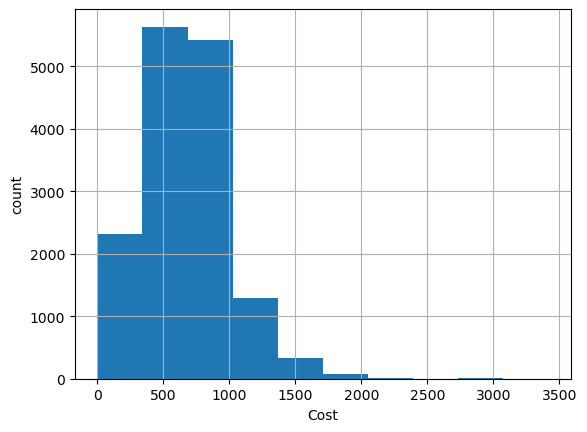

In [39]:
cost.hist()
plt.xlabel('Cost')
plt.ylabel('count');

<AxesSubplot:>

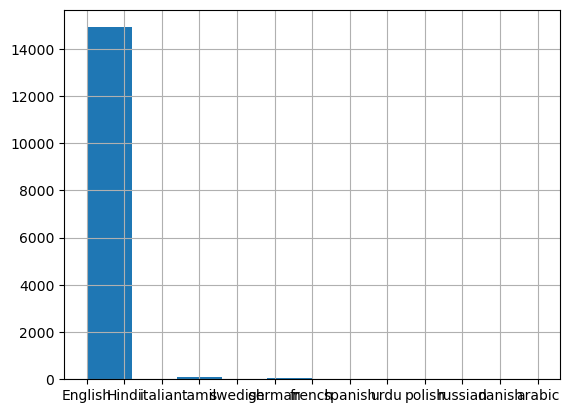

In [40]:
has_ratings['language'].hist()

In [41]:
releaseyear = has_ratings.releaseyear
correlation = has_ratings['stars'].corr(releaseyear)
print(f"Correlation between 'Stars' and year released: {correlation}")

Correlation between 'Stars' and year released: -0.03992927429747746


In [42]:
releasemonth = has_ratings.releasemonth
correlation = has_ratings['stars'].corr(releasemonth)
print(f"Correlation between 'Stars' and month released: {correlation}")

Correlation between 'Stars' and month released: 0.011434232142007405


In [43]:
has_ratings.corr()

/var/folders/s1/tlccbrh56tl749vyv08rkw4h0000gn/T/ipykernel_98588/2364157484.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  has_ratings.corr()


,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date
time,1.000000,0.018357,0.517783,0.000797,0.045676,0.017423,-0.091924,0.019558,-0.032327,0.004214
stars,0.018357,1.000000,0.036274,0.017204,-0.039929,0.011434,-0.007430,-0.006870,-0.008141,-0.019075
price,0.517783,0.036274,1.000000,0.012308,0.030875,0.014594,-0.046842,-0.024723,-0.017849,-0.000605
ratings,0.000797,0.017204,0.012308,1.000000,0.000854,0.018272,-0.001579,-0.001811,-0.011369,-0.001109
releaseyear,0.045676,-0.039929,0.030875,0.000854,1.000000,-0.114347,0.025335,-0.043067,-0.003372,0.018263
releasemonth,0.017423,0.011434,0.014594,0.018272,-0.114347,1.000000,-0.022906,0.024939,-0.000664,-0.001775
has_verb,-0.091924,-0.007430,-0.046842,-0.001579,0.025335,-0.022906,1.000000,-0.327964,-0.005196,-0.015933
has_noun,0.019558,-0.006870,-0.024723,-0.001811,-0.043067,0.024939,-0.327964,1.000000,-0.158218,0.018734
has_adj,-0.032327,-0.008141,-0.017849,-0.011369,-0.003372,-0.000664,-0.005196,-0.158218,1.000000,0.010956
has_date,0.004214,-0.019075,-0.000605,-0.001109,0.018263,-0.001775,-0.015933,0.018734,0.010956,1.000000


/var/folders/s1/tlccbrh56tl749vyv08rkw4h0000gn/T/ipykernel_98588/268858190.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(has_ratings.corr(), annot=True)


<AxesSubplot:>

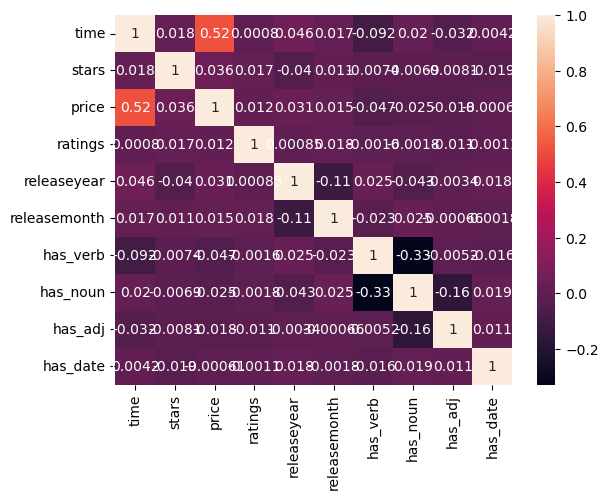

In [44]:
sns.heatmap(has_ratings.corr(), annot=True)

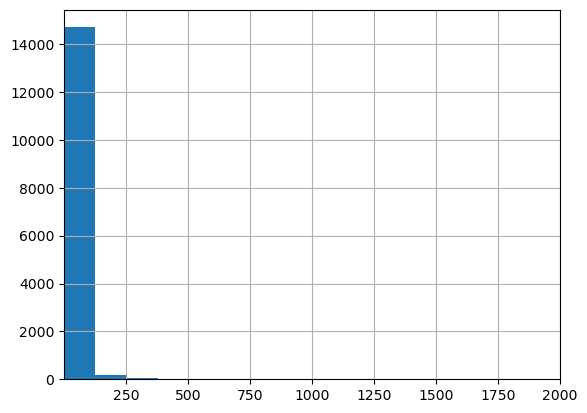

In [45]:
has_ratings['ratings'].hist(bins=100)
plt.xlim([has_ratings['ratings'].min(), 2000])
plt.show()

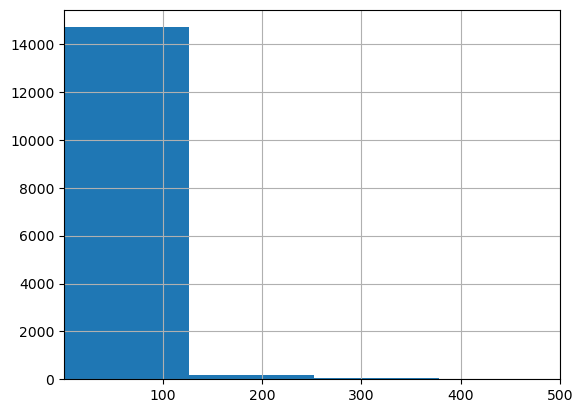

In [46]:
has_ratings['ratings'].hist(bins=100)
plt.xlim([has_ratings['ratings'].min(), 500])
plt.show()

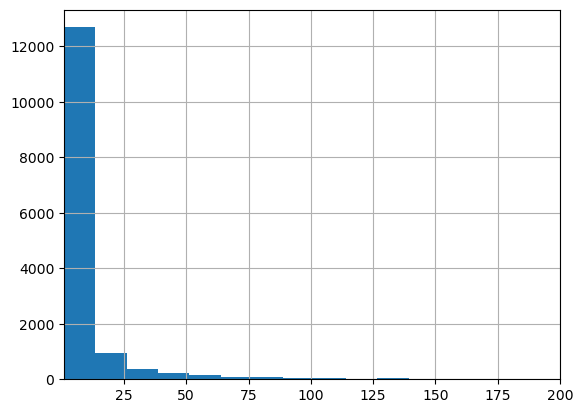

In [47]:
has_ratings['ratings'].hist(bins=1000)
plt.xlim([has_ratings['ratings'].min(), 200])
plt.show()

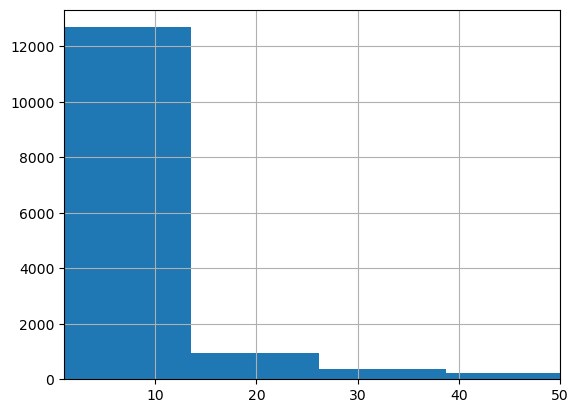

In [48]:
has_ratings['ratings'].hist(bins=1000)
plt.xlim([has_ratings['ratings'].min(), 50])
plt.show()

<AxesSubplot:xlabel='ratings', ylabel='price'>

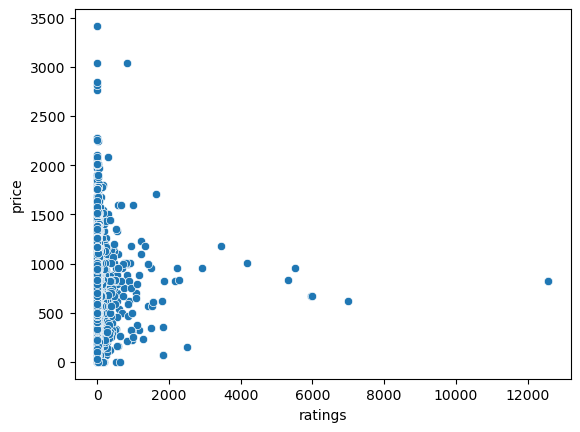

In [49]:
sns.scatterplot(x='ratings', y='price', data=has_ratings)

In [50]:
print(has_ratings[has_ratings['ratings'] > 2000])

                                          name                         author  \
23006                                Elon Musk                    AshleeVance   
26754                                 Becoming                  MichelleObama   
35942                            Atomic Habits                     JamesClear   
41082                                  Sapiens                YuvalNoahHarari   
41106          21 Lessons for the 21st Century                YuvalNoahHarari   
57858                  The Psychology of Money                   MorganHousel   
57863                        Rich Dad Poor Dad               RobertT.Kiyosaki   
58570                  The Psychology of Money                   MorganHousel   
62272                            Atomic Habits                     JamesClear   
62289  How to Win Friends and Influence People                   DaleCarnegie   
62290                            Can't Hurt Me                   DavidGoggins   
62292                       

from the outliers, it seems that the books that are reviewed the most are all nonfiction and have a 4.5 or 5 star review. This shows that genre, a missing field, would be a good datapoint to have as well.

<AxesSubplot:xlabel='releaseyear', ylabel='ratings'>

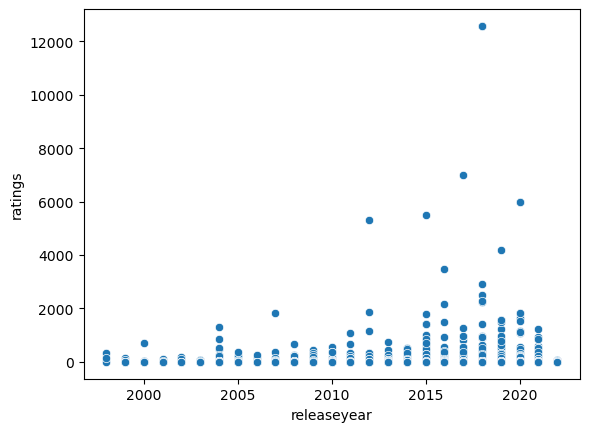

In [51]:
sns.scatterplot(x='releaseyear', y='ratings', data=has_ratings)

<AxesSubplot:xlabel='time', ylabel='ratings'>

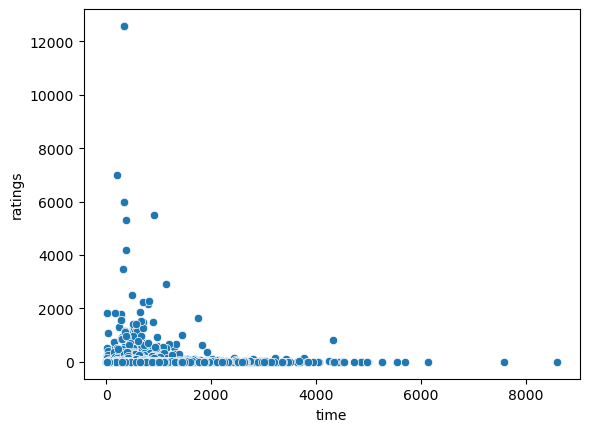

In [52]:
sns.scatterplot(x='time', y='ratings', data=has_ratings)

In [53]:
has_ratings['stars'].unique()

array([5. , 4.5, 4. , 3.5, 3. , 1. , 2. , 2.5, 1.5])

Next Step: Clustering / K-means clustering

1. Normalize data then cluster.
2. Look at how data is distributed with clustering with all variables.
3. Look at how stars are distributed in each cluster.
4. Look at mean, median, std of ratings in each cluster.

In [54]:
#Normalizing data, new dataframe with only numerical values
#create a new dataframe and set index to 'name'
has_ratings_scale = has_ratings.set_index('name')
has_ratings_index = has_ratings_scale.index
has_ratings_scale.head()

,author,narrator,time,releasedate,language,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date
name,,,,,,,,,,,,,,
Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,140,2008-08-04,English,5.0,468.0,34.0,2008,8,False,True,False,False
The Burning Maze,RickRiordan,RobbieDaymond,788,2018-05-01,English,4.5,820.0,41.0,2018,5,False,True,False,False
The Deep End,JeffKinney,DanRussell,123,2020-11-06,English,4.5,410.0,38.0,2020,11,False,True,False,False
Daughter of the Deep,RickRiordan,SoneelaNankani,676,2021-10-05,English,4.5,615.0,12.0,2021,10,False,True,False,False
"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,600,2010-01-13,English,4.5,820.0,181.0,2010,1,False,True,False,False


In [55]:
columns_to_drop = ['author', 'narrator', 'releasedate', 'language']
has_ratings_scale = has_ratings_scale.drop(columns_to_drop, axis=1)
has_ratings_scale.head()

,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date
name,,,,,,,,,,
Geronimo Stilton #11 & #12,140,5.0,468.0,34.0,2008,8,False,True,False,False
The Burning Maze,788,4.5,820.0,41.0,2018,5,False,True,False,False
The Deep End,123,4.5,410.0,38.0,2020,11,False,True,False,False
Daughter of the Deep,676,4.5,615.0,12.0,2021,10,False,True,False,False
"The Lightning Thief: Percy Jackson, Book 1",600,4.5,820.0,181.0,2010,1,False,True,False,False


In [56]:
# Convert boolean values to 1 and 0
has_ratings_scale = has_ratings_scale.astype({'has_verb': 'int32' for has_verb in has_ratings_scale.select_dtypes(include='bool').columns})
has_ratings_scale.head()

,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date
name,,,,,,,,,,
Geronimo Stilton #11 & #12,140,5.0,468.0,34.0,2008,8,0,True,False,False
The Burning Maze,788,4.5,820.0,41.0,2018,5,0,True,False,False
The Deep End,123,4.5,410.0,38.0,2020,11,0,True,False,False
Daughter of the Deep,676,4.5,615.0,12.0,2021,10,0,True,False,False
"The Lightning Thief: Percy Jackson, Book 1",600,4.5,820.0,181.0,2010,1,0,True,False,False


In [57]:
# Convert boolean values to 1 and 0
has_ratings_scale = has_ratings_scale.astype({'has_noun': 'int32' for has_noun in has_ratings_scale.select_dtypes(include='bool').columns})
has_ratings_scale.head()

,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date
name,,,,,,,,,,
Geronimo Stilton #11 & #12,140,5.0,468.0,34.0,2008,8,0,1,False,False
The Burning Maze,788,4.5,820.0,41.0,2018,5,0,1,False,False
The Deep End,123,4.5,410.0,38.0,2020,11,0,1,False,False
Daughter of the Deep,676,4.5,615.0,12.0,2021,10,0,1,False,False
"The Lightning Thief: Percy Jackson, Book 1",600,4.5,820.0,181.0,2010,1,0,1,False,False


In [58]:
# Convert boolean values to 1 and 0
has_ratings_scale = has_ratings_scale.astype({'has_adj': 'int32' for has_adj in has_ratings_scale.select_dtypes(include='bool').columns})
has_ratings_scale.head()

,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date
name,,,,,,,,,,
Geronimo Stilton #11 & #12,140,5.0,468.0,34.0,2008,8,0,1,0,False
The Burning Maze,788,4.5,820.0,41.0,2018,5,0,1,0,False
The Deep End,123,4.5,410.0,38.0,2020,11,0,1,0,False
Daughter of the Deep,676,4.5,615.0,12.0,2021,10,0,1,0,False
"The Lightning Thief: Percy Jackson, Book 1",600,4.5,820.0,181.0,2010,1,0,1,0,False


In [59]:
# Convert boolean values to 1 and 0
has_ratings_scale = has_ratings_scale.astype({'has_date': 'int32' for has_date in has_ratings_scale.select_dtypes(include='bool').columns})
has_ratings_scale.head()

,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date
name,,,,,,,,,,
Geronimo Stilton #11 & #12,140,5.0,468.0,34.0,2008,8,0,1,0,0
The Burning Maze,788,4.5,820.0,41.0,2018,5,0,1,0,0
The Deep End,123,4.5,410.0,38.0,2020,11,0,1,0,0
Daughter of the Deep,676,4.5,615.0,12.0,2021,10,0,1,0,0
"The Lightning Thief: Percy Jackson, Book 1",600,4.5,820.0,181.0,2010,1,0,1,0,0


In [60]:
columns = ['time', 'price', 'releaseyear', 'releasemonth', 'has_verb', 'has_noun', 'has_adj', 'has_date']
x = has_ratings_scale[columns]
x.head()

,time,price,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date
name,,,,,,,,
Geronimo Stilton #11 & #12,140,468.0,2008,8,0,1,0,0
The Burning Maze,788,820.0,2018,5,0,1,0,0
The Deep End,123,410.0,2020,11,0,1,0,0
Daughter of the Deep,676,615.0,2021,10,0,1,0,0
"The Lightning Thief: Percy Jackson, Book 1",600,820.0,2010,1,0,1,0,0


In [61]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
print(X_scaled)

[[-0.90606902 -0.67780182 -1.86589691 ...  0.2907759  -0.3558452
  -0.12612396]
 [ 0.53533467  0.39927537  0.33710005 ...  0.2907759  -0.3558452
  -0.12612396]
 [-0.94388362 -0.85527477  0.77769944 ...  0.2907759  -0.3558452
  -0.12612396]
 ...
 [ 1.01580257  0.79399969  0.33710005 ...  0.2907759  -0.3558452
  -0.12612396]
 [-1.19968829 -2.00884892 -1.64559722 ...  0.2907759  -0.3558452
  -0.12612396]
 [-0.56351321  0.03820972 -2.7470957  ...  0.2907759  -0.3558452
  -0.12612396]]


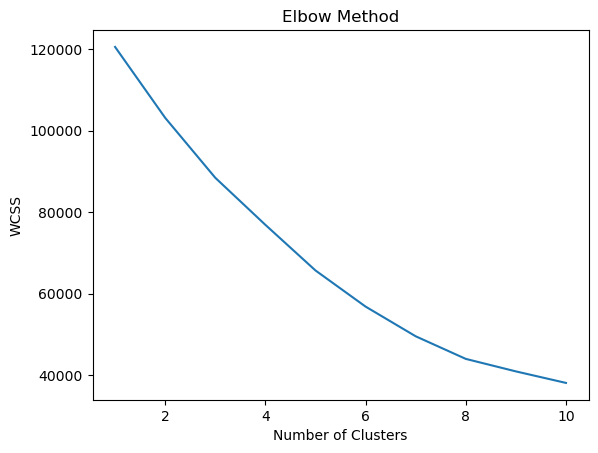

In [62]:
#look at individual clusters 1, 0, 2 by putting into scatterplt, take out ratings and stars (do not look at them as features)
#look at mean, median, mode of ratings/stars

#labels = kmeans.labels_
#centroids = kmeans.cluster_centers_
#centroids

#X_std turn into dataframe, reassign to cluster column

#convert X_std to dataframe
#X_std = pd.DataFrame()
#has_ratings_scale['cluster'] = kmeans.predict(X_std)


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [63]:
kmeans = KMeans(n_clusters=10, random_state=0)

In [64]:
y_kmeans = kmeans.fit_predict(X_scaled)
y_kmeans

array([1, 0, 4, ..., 0, 1, 1], dtype=int32)

In [65]:
data_with_clusters = x.copy()
data_with_clusters['cluster'] = y_kmeans
data_with_clusters

,time,price,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date,cluster
name,,,,,,,,,
Geronimo Stilton #11 & #12,140,468.0,2008,8,0,1,0,0,1
The Burning Maze,788,820.0,2018,5,0,1,0,0,0
The Deep End,123,410.0,2020,11,0,1,0,0,4
Daughter of the Deep,676,615.0,2021,10,0,1,0,0,7
"The Lightning Thief: Percy Jackson, Book 1",600,820.0,2010,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
Why We Fly,56,100.0,2014,6,1,0,0,0,2
River Town,876,836.0,2010,5,0,1,0,0,1
Figures in a Landscape,1004,949.0,2018,6,0,1,0,0,0


In [72]:
df_clust_rate = has_ratings_scale.copy()
df_clust_rate['cluster'] = y_kmeans
df_clust_rate

,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date,cluster
name,,,,,,,,,,,
Geronimo Stilton #11 & #12,140,5.0,468.0,34.0,2008,8,0,1,0,0,1
The Burning Maze,788,4.5,820.0,41.0,2018,5,0,1,0,0,0
The Deep End,123,4.5,410.0,38.0,2020,11,0,1,0,0,4
Daughter of the Deep,676,4.5,615.0,12.0,2021,10,0,1,0,0,7
"The Lightning Thief: Percy Jackson, Book 1",600,4.5,820.0,181.0,2010,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
Why We Fly,56,5.0,100.0,1.0,2014,6,1,0,0,0,2
River Town,876,5.0,836.0,1.0,2010,5,0,1,0,0,1
Figures in a Landscape,1004,4.0,949.0,1.0,2018,6,0,1,0,0,0


In [75]:
df_clust_rate[df_clust_rate['cluster'] == 1].groupby('cluster').mean()

,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date
cluster,,,,,,,,,,
1,411.974707,4.504627,622.983313,18.623689,2007.5219,7.415793,0.047502,0.998766,0.008637,0.0


In [76]:
df_clust_rate[df_clust_rate['cluster'] == 2].groupby('cluster').mean()

,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date
cluster,,,,,,,,,,
2,502.696386,4.461446,713.745783,27.253012,2017.237349,6.240964,0.851807,0.0,0.0,0.0


In [77]:
df_clust_rate[df_clust_rate['cluster'] == 3].groupby('cluster').mean()

,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date
cluster,,,,,,,,,,
3,475.91596,4.424827,655.762529,14.500386,2016.439476,6.56515,0.196608,1.0,1.0,0.0


In [78]:
df_clust_rate[df_clust_rate['cluster'] == 4].groupby('cluster').mean()

,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date
cluster,,,,,,,,,,
4,250.660199,4.413682,295.393532,19.935323,2018.139303,6.079104,0.0,1.0,0.0,0.0


In [79]:
df_clust_rate[df_clust_rate['cluster'] == 5].groupby('cluster').mean()

,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date
cluster,,,,,,,,,,
5,437.055394,4.438776,635.594266,20.521866,2017.036929,6.44655,1.0,1.0,0.0,0.0


In [80]:
df_clust_rate[df_clust_rate['cluster'] == 6].groupby('cluster').mean()

,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date
cluster,,,,,,,,,,
6,2006.86129,4.491935,1268.233871,20.490323,2016.064516,7.158065,0.074194,0.996774,0.029032,0.0


In [81]:
df_clust_rate[df_clust_rate['cluster'] == 7].groupby('cluster').mean()

,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date
cluster,,,,,,,,,,
7,579.011003,4.475405,787.88932,31.458576,2017.916828,9.672492,0.0,1.0,0.0,0.0


In [82]:
df_clust_rate[df_clust_rate['cluster'] == 8].groupby('cluster').mean()

,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date
cluster,,,,,,,,,,
8,518.536145,4.518072,724.358434,11.403614,2016.993976,6.373494,0.283133,0.0,1.0,0.0


In [83]:
df_clust_rate[df_clust_rate['cluster'] == 9].groupby('cluster').mean()

,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date
cluster,,,,,,,,,,
9,562.355932,4.347458,687.944915,19.788136,2017.127119,6.529661,0.165254,0.961864,0.139831,1.0


In [84]:
df_clust_rate[df_clust_rate['cluster'] == 10].groupby('cluster').mean()

,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date
cluster,,,,,,,,,,


In [85]:
df_clust_rate[df_clust_rate['cluster'] == 1].groupby('cluster').median()

,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date
cluster,,,,,,,,,,
1,368.0,4.5,615.0,3.0,2008.0,8.0,0.0,1.0,0.0,0.0


In [86]:
df_clust_rate[df_clust_rate['cluster'] == 2].groupby('cluster').median()

,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date
cluster,,,,,,,,,,
2,479.0,4.5,702.0,2.0,2018.0,6.0,1.0,0.0,0.0,0.0


In [87]:
df_clust_rate[df_clust_rate['cluster'] == 3].groupby('cluster').median()

,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date
cluster,,,,,,,,,,
3,452.0,4.5,668.0,2.0,2018.0,7.0,0.0,1.0,1.0,0.0


In [88]:
df_clust_rate[df_clust_rate['cluster'] == 4].groupby('cluster').median()

,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date
cluster,,,,,,,,,,
4,202.5,4.5,305.0,2.0,2019.0,6.0,0.0,1.0,0.0,0.0


In [89]:
df_clust_rate[df_clust_rate['cluster'] == 5].groupby('cluster').median()

,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date
cluster,,,,,,,,,,
5,424.0,4.5,668.0,2.0,2018.0,6.0,1.0,1.0,0.0,0.0


In [90]:
df_clust_rate[df_clust_rate['cluster'] == 6].groupby('cluster').median()

,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date
cluster,,,,,,,,,,
6,1738.5,4.5,1308.5,3.0,2017.0,7.0,0.0,1.0,0.0,0.0


In [91]:
df_clust_rate[df_clust_rate['cluster'] == 7].groupby('cluster').median()

,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date
cluster,,,,,,,,,,
7,545.0,4.5,754.0,2.0,2018.0,10.0,0.0,1.0,0.0,0.0


In [92]:
df_clust_rate[df_clust_rate['cluster'] == 8].groupby('cluster').median()

,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date
cluster,,,,,,,,,,
8,481.0,4.5,703.0,2.0,2018.0,6.0,0.0,0.0,1.0,0.0


In [93]:
df_clust_rate[df_clust_rate['cluster'] == 9].groupby('cluster').median()

,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date
cluster,,,,,,,,,,
9,496.0,4.5,702.0,2.0,2019.0,7.0,0.0,1.0,0.0,1.0


In [94]:
df_clust_rate[df_clust_rate['cluster'] == 10].groupby('cluster').median()

,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date
cluster,,,,,,,,,,


In [66]:
data_with_clusters.cluster.value_counts()

7    3090
0    2978
5    2058
4    2010
1    1621
3    1297
2     830
6     620
8     332
9     236
Name: cluster, dtype: int64

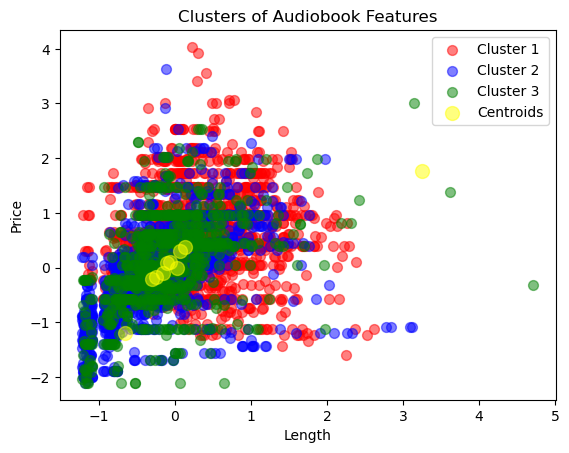

In [67]:
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1', alpha=0.5)
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2', alpha=0.5)
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids', alpha=0.5)
plt.title('Clusters of Audiobook Features')
plt.xlabel('Length')
plt.ylabel('Price')
plt.legend()
plt.show()

In [69]:
mean_rating = has_ratings_scale['ratings'].mean()
mean_star = has_ratings_scale['stars'].mean()
print(f"Mean rating: {mean_rating}")
print(f"Mean star: {mean_star}")

Mean rating: 21.61319002123142
Mean star: 4.456940021231422


In [70]:
median_rating = has_ratings_scale['ratings'].median()
median_star = has_ratings_scale['stars'].median()
print(f"Median rating: {median_rating}")
print(f"Median star: {median_star}")

Median rating: 2.0
Median star: 4.5


In [71]:
mode_rating = has_ratings_scale['ratings'].mode()
mode_star = has_ratings_scale['stars'].mode()
print(f"Mode rating: {mode_rating}")
print(f"Mode star: {mode_star}")

Mode rating: 0    1.0
Name: ratings, dtype: float64
Mode star: 0    5.0
Name: stars, dtype: float64


Next step after clustering: Classification

1. 4.5 or 5 will be 1. Everything else 4 and below is not good and equal to 0. Use stars for classification (not ratings).